# Week 1 Notes

## Computer Vision

### Introduction

Many applications in computer vision are now solved by deep learning. There are two benefits from studying these problems and solutions:

* There is still scope for creating products and applications using deep learning inspired computer vision techniques.

*  The computer vision community has been very inventive in solving problems using deep learning. Their approaches can provide insight when working on other problems such as speech or text.

Computer vision is concerned mostly with inputs that are image or video data.

### Examples of CV Problems

#### Image Classification

Classifying an object as one of several classes (one of which may be the background or unassigned class). The simplest case is a binary classifier - the canonical teaching example being a cat classifier.

#### Object Detection

object detection is the compound task of finding an object (bounding box or scene pixel segmentation) and then classifying it from an image.

#### Neural Style Transfer

Neural style transfer is taking two images - from one of them the neural style is extracted, the other is then redone using the neural style to create a new image; a combination of the two.

#### Face Recognition
The face recognition task is to locate a face in an image and then check if it matches one of the faces in a register or else return an unmatched classification if it is not matched. The particular desired properties of such a classifier are specific to the details of the application. For example face recognition to access a bank account needs a very high precision, but low recall is acceptable - because giving the wrong person access is not permitted.


### Large Inputs: Deep Learning on High Resolution Images

#### Scaling Problem with Large Inputs

When the inputs run into the millions, then training a fully connected neural network becomes very difficult, because the number of training parameters can run into the billions of hundreds of billions. Even with current compute, it will just take too long and too much compute to train a FCNN.

Image data at high resolution will easily have millions of pixels of input - hence a different approach is needed.

#### Convolution Operation Mitigates Scaling on Large Inputs

The convolution operator applies a filter to subregions of an image. For each region it computes pairwise multiplications and then sums over various regions of an image - the dot product. The regions are chosen sequentially and must be overlapping. The output of the filter is a multidimensional array storing the dot product of each.

The convolution operation effectively shares parameters (the filter weights) locally across inputs, thus needing fewer parameters and less compute to be learned.

Using the convolution operator it becomes possible to learn levels of features, be robust to rotations and still lead to good outputs.

## Convolution Operation

### Derivative of An Image

Finding interesting features of an image involves find areas where there is the greatest change in an image. One way to do this is it find the derivative of an image.

Since an image is a discretized representation, the smallest change is 1 unit. Looking at forward, backward and central derivatives these are just different representations of the approximate derivative:

* Forward: `f(x+1) - f(x)`

* Central: `f(x+1) -f(x-1)`

* Backward: `f(x) -f(x-1)`

To get a good estimate of the derivative of a pixel we average around it. Usually given that a pixel will have 8 direct neighbors, using the 8 local pixels is common. It total 9 pixels will be used to compute the 

It can be shown that these and other derivatives are just masks applied to an image.

### Convolution Operation 

Though the layers of a CNN are colloquially referred to as convolutions, this is only by convention.

Mathematically, the operation is technically a sliding dot product or cross-correlation of an image against a filter. This can be expressed using the numpy einsum function, based on einstein notation.

The filter aka a kernel in the literature, is an array of equal or smaller size that is positioned (or overlayed) over various sub regions of an image. 

For each sub region (like a subsample), a single number is returned - the sum of the hadamard product matrix of the filter over the region. This output is stored in the output matrix - whose size will be determined by the size of the image and the size of the kernel - sequentially. The output size is actually `(n - f + 1) x (n - f + 1)`, where `n` is the size of the image and `f` is the size of the filter.

This convolution is technically a cross correlation of the filter and the image.

`sliding_dot_product(image_subsample, filter)` is the calculation that finds the .

A convolutional neural network consists of an input and an output layer, as well as multiple hidden layers. The hidden layers of a CNN typically consist of a series of convolutional layers that convolve with a multiplication or other dot product. 

The activation function is commonly a RELU layer, and is subsequently followed by additional convolutions such as pooling layers, fully connected layers and normalization layers, referred to as hidden layers because their inputs and outputs are masked by the activation function and final convolution. The final convolution, in turn, often involves backpropagation in order to more accurately weight the end product.

## Edge Detection Examples

### Vertical Edge Detection

Different filters detect different aspects of an image. We'll show a hard-coded filter (a 3x3 vertical edge filter) being applied to an image here. 

First a simple example of the mechanics involved in calculating a sliding dot product. This is for a filter_arr that fits exactly into the image_arr.

In [1]:
def sliding_dot_product(image_arr, filter_arr):
    pass

#### Vertical Edge Filter

Here is a vertical edge filter. This filter is looking for an edge by differentiating the image with respect to the 8 local pixels.

In [2]:
import numpy as np

v_edge_filter = np.array([1,0,-1,1,0,-1,1,0,-1]).reshape((3,3))
v_edge_filter

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

In [3]:
v_edge_filter.shape

(3, 3)

This kernel is a simple array, which is calculating the central derivative and averaging it along the x-axis, hence we look rapid changes along the vertical axis, which demonstrate a vertical edge.

#### Example 1: Image With Little Vertical Edges

We're going to apply this vertical edge detector to an image of the [afghan girl](https://en.wikipedia.org/wiki/Afghan_Girl) - this is a striking photo, called the mona lisa of the developing world by some.

![](./afghan_girl.jpg)

In [4]:


import matplotlib.pyplot as plt
img = plt.imread('./afghan_girl.jpg')
img.shape



(720, 1280, 3)

In [5]:
type(img)

numpy.ndarray

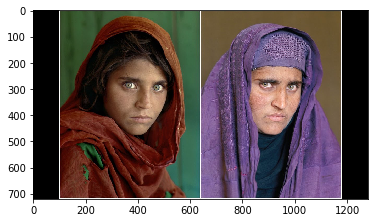

In [6]:
plt.imshow(img)

In [7]:
img.strides

(3840, 3, 1)

In [8]:
img_g = img[:, :, 0] # np.mean(img,-1,dtype=float)
img_g.shape

(720, 1280)

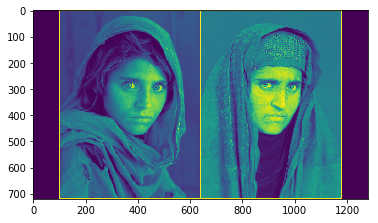

In [9]:
plt.imshow(img_g)

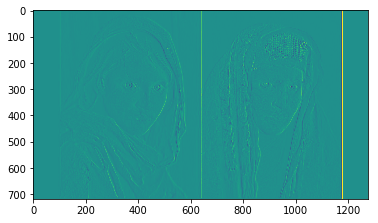

In [10]:
def conv2d(a, f):
    """2d convolution, usually approximating some kind of image derivative
    
    Arguments:
        a {array} -- original image array
        f {array} -- filter or kernel array
    """
    s = f.shape + tuple(np.subtract(a.shape, f.shape) + 1)
    strd = np.lib.stride_tricks.as_strided
    subM = strd(a, shape = s, strides = a.strides * 2)
    return np.einsum('ij,ijkl->kl', f, subM)

v_im = conv2d(img_g[:, 0:1278], v_edge_filter)
plt.imshow(v_im)

Well, turning the image to grayscale and then applying the filter was disappointing.

Let's try to apply a horizontal filter.

In [11]:
h_edge_filter = np.array([1,0,-1,1,0,-1,1,0,-1]).reshape((3, 3)).T
h_edge_filter

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

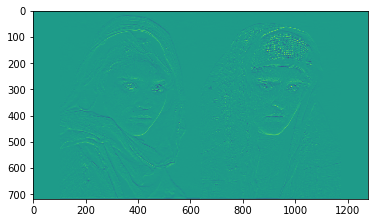

In [12]:
h_im = conv2d(img_g, h_edge_filter)
plt.imshow(h_im)

#### Example 2: Image With Clearer  Edges

Selena Gomez ![](./selena_gomez.jpg)



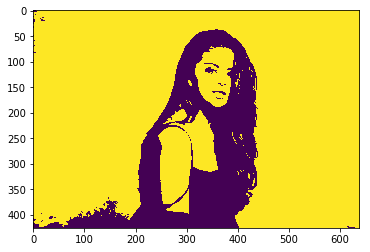

In [13]:
img = plt.imread('./selena_gomez.jpg')
img_g =  img[:, :, 1]

def to_binary(pixel):
    result = 255 if pixel > 127 else 10
    return result
v_to_binary = np.vectorize(to_binary)
img_b = v_to_binary(img_g)
plt.imshow(img_b)



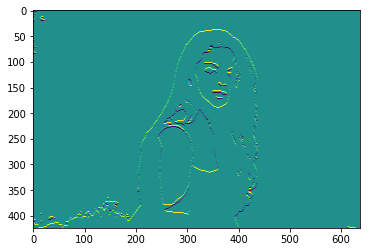

In [14]:
h_im = conv2d(img_b, h_edge_filter)
plt.imshow(h_im)

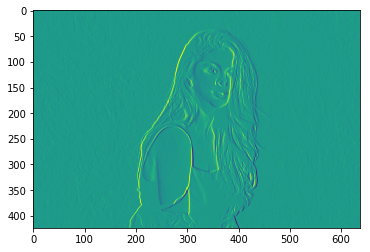

In [15]:
v_im = conv2d(img_g, v_edge_filter)
plt.imshow(v_im)

### More Edge Detection

These 2 by 2 or 3 by 3 filters can be applied to various images and in different forms.

### Vertical and Horizontal Edge Filters

As we have seen, vertical and horizontal filters using central image derivatives can be applied.

### Other Edge Filters

#### Sobel Filter

The Sobel filter places different weights on the image derivative when convolved with an image. The Sobel filter puts more emphasis on the pixel and less on its neighbours. Here it is:

$$\begin{bmatrix} 1 & 0 & -1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{bmatrix}$$

#### Scharr Filter

The Scharr Filter places different weights on the image derivative when convolved with an image. Performance is similar to Sobel filter.

$$\begin{bmatrix} 3 & 0 & -3 \\ 10 & 0 & -10 \\ 3 & 0 & -3 \end{bmatrix}$$


### Learning Filters

Rather than imposing a hand crafted filter, it can be learned as weight parameters fed into a learning algorithm - usually via gradient descent optimization.

$$\begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33} \end{bmatrix}$$

Such a filter can learn edges at angles other than 0 degrees or 90 degrees, for example 45 degrees or 73 degrees say.

## Padding

### Convolution With No Padding

Convolving an image with a filter will result in output of different shape. As a simple example, for an image that is 4 by 4, and a 3 by 3 filter, the convolution will give (4 - 3 + 1) by (4 - 3 + 1) or 2 by 2 output. That is:


$$ \left[\begin{array}{cccc}
u1 & u2 & u3 & u4	\\
x1 & x2 & x3 & x4	\\
y1 & y2 & y3 & y4	\\
z1 & z2 & z3 & z4
\end{array}\right]
*
\begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33} \end{bmatrix}  =  
  \left[ {\begin{array}{cc}
   1 & 2 \\
   3 & 4 \\
  \end{array} } \right]
$$

This has a desired effect of reducing the output and using fewer parameters than a FCNN. 

However, there some problems with this approach for training deep layer networks that incorporate the peripheral information, namely:

* The output is reduced by the filter size less 1 for each convolution from the input. This will quickly reduce the input to deep layers - limiting the depth possible.

* The overlapping subregions don't concentrate enough on the pixels/input features at the image borders, since there aren't as many subregions including the border areas.

To remedy this, we use padding to enlarge the size of the input. The padding concept is discussed in detail below.

### Convolutions With Padding

By adding padding to the edge/border of an image we can mitigate the two problems explained above. That is we add/augment with a trim of 0's padding the edge. The thickness of the padding is denoted by a parameter p.

The effect is to increase an image size from n by n to (n + 2p) by (n + 2p) - this is from p. Then the output of a f by f convolution is (n + p - f + 1) by (n + p - f + 1). 

This padding with zeros is usually called `zero padding`. 

There are two major types of padding:

* Same Padding: The output has the same length as the input - $p = (f-1)/2$ for 2d array inputs - from rearranging the arithmetic of the output shape, that is solving `n +2p -f +1 = n`. Usually $f$ is chosen to be odd, so that $p$ is an integer. 

* Valid Padding: No padding, $p = 0$.

Another type of padding referenced in a popular NN building framework, keras, is causal. With causal padding - dilation is applied so that the `output[t]` does not depend on `input[t + 1:]`. A zero padding is used such that the output has the same length as the original input. Useful when modeling temporal data where the model should not violate the temporal order.

More on dilation later. 

When specifying padding, one can say:

* Explicitly set `p` as an integer.

* "Same", which means choose `p` according to filter size.

* "Valid", which means `p = 0`

## Strided Convolutions

### Strides

Strides are steps between one sub-matrix region and the other. They change the dimensions of the output.

![](strides.jpg)

The expression for the shape of the output of a convolution made with filter of size f by f, applied to an image with p padding on the edges and with a stride of s is:

$ \Bigl\lfloor\frac{n + 2p - f }{s} + 1 \Bigr\rfloor\qquad  $

### Mathematical Convolutions and Cross Correlations

Technically what we have been showing, these are called cross correlations. A convolution involves flipping the filter matrix before doing the operations we showed. However, conventionally in Deep Learning literature, cross correlations are just called convolutions.

![](cross_correlation.jpg)

## Convolutions Over Volumes

When an input (such as a color image) has three (the third dimension referred to as a channels) or more dimensions, then we can use a filter with the same dimensions and compute 3 dimensional dot product. This is then placed as a component of the 2d output array. 

### Volume Filters

If we have many such 3d filters, then we can collect the output 2d arrays and form a 3d output volume. The number of filters must be equal to the number of channels. The figures below are indicative:

![]( convolution_volume1.png)
![]( convolution_volume2.jpeg)
![]( convolution_volume3.png)

The output dimension formula would be:
 $n_h$ by $n_w$ by $n_c$ convolved with $f$ by $f$ by $n_c$ , results in output of size:

$n_h - f + 1$ by $n_w - f + 1$ by $n_c$ 

With padding and striding, we'd have:

$ \Bigl\lfloor\frac{n_h + 2p - f }{s} + 1 \Bigr\rfloor\qquad  $ by $ \Bigl\lfloor\frac{n_w + 2p - f }{s} + 1 \Bigr\rfloor\qquad$ by $\qquad n_c$.

Note that both filter and image must have the same third dimension parameter, $n_c$.

## One Layer Of A Convolutional Network

### Example of One Convolutional Layer 

We'll look at an example of a convolution for one layer. The objective is to get comfortable with the variables and notation.

![](one_conv_layer_example.png)

### Details

In the figure from the example above, let's work through parameters, dimensions and hyperparameters.

#### Input And Parameters

Input/Image: 6 x 6 x 3

Filter/Kernel: 3 x 3 x 3: 10 filters

Weights: 3 x 3 x 3 x 10 = 270

Bias: 10 x 1 = 10

Output: (4-3+1) x (4-3+1) =  2 by 2

#### HyperParameters

Stride: 0

Padding: 0 - "valid"

Activation Function: ReLU

#### Recurrence Relation

$ m = $ number of examples $ = n^{0}$ 

$ A^{[L-1]}$ is the input to the $L^{th}$ layer neural network

$ Z^{[L-1]} = W^{[L-1]} A^{[L-1]} + B^{[L-1]}$

Where $W^{[L-1]}$ is the weight parameters of a given filter, and $B^{[L-1]}$ are the bias parameters.

$A^{[L]} = G(Z^{[L-1]})$ is the recurrence relation to link from the linear combination of one layer to its output - which is the input of the next layer.

#### Notation of One Convolutional Layer

Here we'll work through the dimensions and expressions involved precisely. If layer $[L]$ is a convolutional layer then:

* $f^{[L]}$ is the filter size. The shape of each filter is: $f^{[L]}$ by $f^{[L]}$ by $n^{[L-1]}_c$

* $p^{[L]}$ is the padding
* $s^{[L]}$ is the stride
* $n^{[L]}_c$ is the number of filters
* $n^{[L]}_H$ is the height of of the input. It's value is:

$ n^{[L]}_H = \Bigl\lfloor\frac{n^{[L]}_H + 2p - f }{s} + 1 \Bigr\rfloor\qquad  $

* $n^{[L]}_W$ is the width of the input. It's value is:

$ n^{[L]}_w =  \Bigl\lfloor\frac{n^{[L]}_W + 2p - f }{s} + 1 \Bigr\rfloor\qquad  $

* $m^{[L]}$ is the number of examples
* $a^{[L]}$ is the output of the activation function. The shape of a is:

* $A^{[L]}$ is the matrix form of a for all examples. The shape of A is:


* no firm agreement on the shape of $A$ - that is how the dimensions should be ordered. For example the shape of A could be one of:

* m by $n^{[L]}_W$ by $n^{[L]}_H$ by $n^{[L]}_c$ 

* m by $n^{[L]}_H$ by $n^{[L]}_W$ by $n^{[L]}_c$

* m by $n^{[L]}_H$ by $n^{[L]}_c$ by $n^{[L]}_W$

How the shape of A is defined - it really depends on the specifics of the paper. The first two are more common.


## Simple Convolutional Network Example

Here is a design and parameters for a simple convolutional network. Just to practice the notation from the section above.

### Simple Network



## Pooling Layers

There are two major types of pooling filters, which replaces the parameters of the previous out with a single scalar in each subregion as output of the input-filter convolution.

These filters have no parameters to learn, but do have filter size, padding and stride parameters. One may choose to tune them via hyperparameter selection (through cross validation) or else a common setting is filter size $f= 2$, padding $p = 0$ and stride $s = 2$.

### Max Pooling

With max pooling filters, all values in the output matrix of a convolutional layer are replaced by the largest value in that matrix subregion. The rationale is that the strongest presence in any part of the output matrix indicates the level of presence of the filtered feature.

![](max_pooling.png)

### Average Pooling

As above, but instead of using max pooling filter, the average filter of the output matrix subregion is used as the representative value.

![](average_pooling.png)


### Notes

It is much more common to see max pooling than average pooling in modern high performance architectures.

Pooling can and is applied to an input with $n_c$ channels on a channel by channel basis. That is the pooling is applied to the matrix in each channel and the outputs are then aggregated.

There are no parameters to learn, just selection of hyperparameters for $p,s,$ and $f$ if desired.

## CNN Example: MNIST 

This example is very similar, but not exactly like the LeNet-5 architecture from Yann LeCun in his 1995 paper. It might be better to say that the architecture is inspired by LeNet-5.

## Why Convolutions?

A good question is why do convolutions, as opposed to a fully connected network? As mentioned before one reason is that it leads to orders of magnitude fewer parameters. Another is that it picks on the locality of related input neurons - which leads to more robust trained networks. We'll explain this some more below. 

### Parameter Sharing

A feature detector (a learned filter - where the parameters have been determined) that is useful in one part of an image, is probably useful in other parts of an image - hence the subregions that are learned from. Convolutionally learned filters enable this.


### Sparsity of Connections

It makes sense that in image type data, that nearby pixels/neurons have impact on the activation output for a pixel/neuron. By only allowing local neurons to impact the output of activation, we get a stronger signal.

### Translation Invariance

The above two properties lead to translation invariance, that is if an expected feature is some pixels away from expected - then the networks can still recognize and encode it due to the robustness of convolutions which share parameters, learn from overlapping subregions and are locally learned.

### Putting It All Together

How can we use all these components craftily put together. Well look at the image below:

![](all_together.png)

We start with many examples of a multidimensional pattern and target.

The image is of a typical ConvNet architecture - that is convolutions, pooling, maybe repeated many times, followed by a few layers of fully connected networks to reach the final output - usually either softmax or linear output.

We can specify the parameters of weights and biases and then set a loss function of the output of the network vs the ground truth label. 

From that, we can learn all the weight and bias parameters using gradient descent or some other optimizer from the same family such as the ADAM optimizer to find an acceptable and useful local minima of the loss function.